# Sentiment Analysis of Different Artists on Spotify

Spotify collects music data and attributes certain audio features to each track. We can utilise that data to perform sentiment analysis of different artists on Spotify by use of their web API.

The audio features attributed to each track can be found in their [web API docs](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features) and summarised below: 
- **Acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

- **Danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

- **Energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

- **Instrumentalness**: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

- **Key**: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1. (>= -1 <= 11)

- **Liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

- **Loudness**: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

- **Speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

- **Tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

- **Time Signature**: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".

- **Valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

In [1]:
# imports
import pandas as pd
import spotipy
import matplotlib.pyplot as plt
import seaborn as sns
from spotipy.oauth2 import SpotifyClientCredentials
from bokeh.io import curdoc,show, output_notebook
from bokeh.models import ColumnDataSource,HoverTool
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

You will need to create a spotify developer account at [developer.spotify.com](https://developer.spotify.com/dashboard/applications) and create an application to recieve a client id and secret.

In [2]:
cid = ''
csec = ''
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=csec)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
sp.trace=False

In [3]:
# function to grab artist song data given artist name
def getArtistSongs(artist_name):
    # audio features we want
    data_features = ["name", "danceability", "energy", "tempo", "loudness", "acousticness", "valence", "instrumentalness", "key", "liveness", "time_signature", "speechiness"]
    # search spotify
    query = sp.search(q=artist_name, limit=50)
    tids = []
    for i, t in enumerate(query['tracks']['items']):
        tids.append(t['uri'])
    features = sp.audio_features(tids)
    songs = pd.DataFrame(features)
    songs['name'] = [d['name'] for d in query['tracks']['items']]
    songs['duration_ms'] = [d['duration_ms'] for d in query['tracks']['items']]
    songs['artist_name'] = artist_name
    songs.index = [artist_name for i in range(len(songs))]
    return songs[data_features]

We should now be able to grab data from spotify.

In [4]:
# get song data
kendrick_df = getArtistSongs('Kendrick Lamar')

In [5]:
kendrick_df.sort_values('valence')

,name,danceability,energy,tempo,loudness,acousticness,valence,instrumentalness,key,liveness,time_signature,speechiness
Kendrick Lamar,"Bitch, Don’t Kill My Vibe",0.587,0.698,133.954,-8.948,0.015200,0.0985,0.000000,1,0.4420,4,0.0943
Kendrick Lamar,"Bitch, Don’t Kill My Vibe",0.587,0.698,133.954,-8.948,0.015200,0.0985,0.000000,1,0.4420,4,0.0943
Kendrick Lamar,"God Is Fair, Sexy Nasty (feat. Kendrick Lamar)",0.467,0.410,95.931,-12.028,0.328000,0.1360,0.000043,2,0.1130,4,0.1850
Kendrick Lamar,range brothers (with Kendrick Lamar),0.667,0.582,121.972,-5.791,0.004660,0.1410,0.000000,11,0.1240,4,0.2670
Kendrick Lamar,family ties (with Kendrick Lamar),0.711,0.611,134.140,-5.453,0.005750,0.1440,0.000000,1,0.2310,4,0.3290
Kendrick Lamar,family ties (with Kendrick Lamar),0.711,0.611,134.093,-5.453,0.005880,0.1440,0.000000,1,0.2300,4,0.3300
Kendrick Lamar,Dedication (feat. Kendrick Lamar),0.512,0.734,93.995,-5.448,0.431000,0.1680,0.000000,8,0.2260,4,0.4380
Kendrick Lamar,Pray For Me (with Kendrick Lamar),0.735,0.677,100.584,-4.979,0.076200,0.1880,0.000022,2,0.1110,4,0.0930
Kendrick Lamar,Swimming Pools (Drank),0.577,0.447,74.236,-5.892,0.006270,0.1890,0.000220,8,0.0899,4,0.2770
Kendrick Lamar,Pray For Me,0.732,0.678,100.626,-4.977,0.086700,0.1960,0.000024,2,0.1120,4,0.0886


Seems like there are some duplicates, we can quickly clean up the data.

In [6]:
# check for duplicates
kendrick_df.duplicated().sum()

4

In [7]:
# drop duplicates
kendrick_df.drop_duplicates(subset=None, keep="first", inplace=True)

kendrick_df.sort_values('valence')

,name,danceability,energy,tempo,loudness,acousticness,valence,instrumentalness,key,liveness,time_signature,speechiness
Kendrick Lamar,"Bitch, Don’t Kill My Vibe",0.587,0.698,133.954,-8.948,0.015200,0.0985,0.000000,1,0.4420,4,0.0943
Kendrick Lamar,"God Is Fair, Sexy Nasty (feat. Kendrick Lamar)",0.467,0.410,95.931,-12.028,0.328000,0.1360,0.000043,2,0.1130,4,0.1850
Kendrick Lamar,range brothers (with Kendrick Lamar),0.667,0.582,121.972,-5.791,0.004660,0.1410,0.000000,11,0.1240,4,0.2670
Kendrick Lamar,family ties (with Kendrick Lamar),0.711,0.611,134.140,-5.453,0.005750,0.1440,0.000000,1,0.2310,4,0.3290
Kendrick Lamar,family ties (with Kendrick Lamar),0.711,0.611,134.093,-5.453,0.005880,0.1440,0.000000,1,0.2300,4,0.3300
Kendrick Lamar,Dedication (feat. Kendrick Lamar),0.512,0.734,93.995,-5.448,0.431000,0.1680,0.000000,8,0.2260,4,0.4380
Kendrick Lamar,Pray For Me (with Kendrick Lamar),0.735,0.677,100.584,-4.979,0.076200,0.1880,0.000022,2,0.1110,4,0.0930
Kendrick Lamar,Swimming Pools (Drank),0.577,0.447,74.236,-5.892,0.006270,0.1890,0.000220,8,0.0899,4,0.2770
Kendrick Lamar,Pray For Me,0.732,0.678,100.626,-4.977,0.086700,0.1960,0.000024,2,0.1120,4,0.0886
Kendrick Lamar,m.A.A.d city,0.487,0.729,91.048,-6.815,0.053800,0.2170,0.000004,2,0.4400,4,0.2710


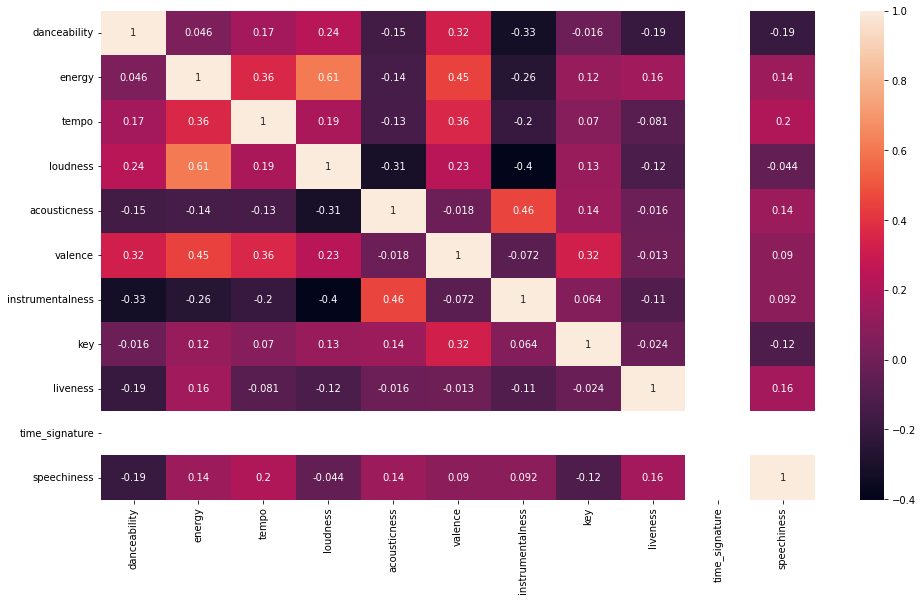

In [10]:
plt.figure(figsize=(16,9))
sns.heatmap(kendrick_df.corr(), annot=True)
plt.show()

Lets plot some of this data with bokeh.

In [11]:
# column datasource
data = kendrick_df.copy()

source = ColumnDataSource(data={
    'x': data.loc['Kendrick Lamar'].valence,
    'y': data.loc['Kendrick Lamar'].danceability,
    'name': data.loc['Kendrick Lamar'].name
})

xmin, xmax = min(data.loc['Kendrick Lamar'].valence), max(data.loc['Kendrick Lamar'].valence)

ymin, ymax = min(data.loc['Kendrick Lamar'].danceability), max(data.loc['Kendrick Lamar'].danceability)

# Create the figure: plot
plot = figure(title='Top 50 Most popular songs by {0}'.format('Kendrick Lamar'), plot_height=400, plot_width=700,
              x_range=(xmin, xmax), y_range=(ymin, ymax))

# Add circle glyphs to the plot
plot.circle(x='x', y='y', fill_alpha=0.8, source=source)

# Set the x-axis label
plot.xaxis.axis_label ='Valence'

# Set the y-axis label
plot.yaxis.axis_label = 'Danceability'

# Create a HoverTool: hover
hover = HoverTool(tooltips = [('Name', '@name')])
# Add the HoverTool to the plot
plot.add_tools(hover)
show(plot)

In [ ]:
# query = sp.search(q="AC/DC", limit=1)
# query
# songs = pd.DataFrame()
# songs['name'] = [d['name'] for d in query['tracks']['items']]
# songs
# tids = []
# for i, t in enumerate(query['tracks']['items']):
#     tids.append(t['uri'])
# tids